In [1]:
import numpy as np
import math
import torch
from torch import nn

import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
from livelossplot import PlotLosses
from Inference.GeNVI_predictive import GeNPredVI, GeNetEns

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [17]:
from Experiments.foong import Setup
setup=Setup(device,layerwidth=5,nblayers=2)

# Target density #

In [18]:
logprior=setup.logPredPrior
loglikelihood=setup.loglikelihood
projection=setup.projection
size_sample=setup.n_train_samples
param_count=setup.param_count
model=setup._model

size_sample

200

# Generative Network #

In [25]:
activation = nn.Tanh()#nn.ReLU()
init_b = .001
lat_dim=5


GeN = GeNetEns(1, lat_dim, 50, param_count, activation, 0.2, init_b, device)

In [26]:
%matplotlib inline
from tempfile import TemporaryDirectory


k_MC=100#size_sample

#sample, = ax.scatter([],[],color='red',alpha=0.07)
#fig.canvas.draw()
    
    
'''
def show(GeN,n,alpha=0.07):
    Z=GeN(n).detach().clone().cpu()
    plt.pcolormesh(grid_x.numpy(),grid_y.numpy(),p.exp().numpy())
    plt.scatter(Z[:,0],Z[:,1],color='red',alpha=alpha) 
    plt.draw()
    plt.show()
''' 

def show(GeN,n):
    #Z=GeN(200).detach()
    #fig=setup.makePlot(Z,device)
    #plt.show()
    return
    
#lr =.03 for lat_dim 5

with TemporaryDirectory() as temp_dir:
    optimizer = GeNPredVI(loglikelihood, logprior, projection, k_MC,
		                                    0, 100, 1000, 50, 50,
		                                    20000, .01, .00001, 200, .5,
		                                    device, True, temp_dir, save_best=True)
    best_epoch, scores=optimizer.run(GeN,show)
print(best_epoch,scores)

Epoch [0/20000], Loss: 19185.373046875, Entropy -277.71697998046875, Learning Rate: 0.01
Epoch [1/20000], Loss: 8874.4814453125, Entropy -286.50384521484375, Learning Rate: 0.01
Epoch [2/20000], Loss: 5438.6806640625, Entropy -298.22686767578125, Learning Rate: 0.01
Epoch [3/20000], Loss: 9164.26953125, Entropy -306.91131591796875, Learning Rate: 0.01
Epoch [4/20000], Loss: 4904.8251953125, Entropy -314.847412109375, Learning Rate: 0.01
Epoch [5/20000], Loss: 3312.064208984375, Entropy -340.0749816894531, Learning Rate: 0.01
Epoch [6/20000], Loss: 3739.7763671875, Entropy -338.7950439453125, Learning Rate: 0.01
Epoch [7/20000], Loss: 4047.796875, Entropy -353.6628723144531, Learning Rate: 0.01
Epoch [8/20000], Loss: 3981.8671875, Entropy -359.8682556152344, Learning Rate: 0.01
Epoch [9/20000], Loss: 3497.3388671875, Entropy -363.1210021972656, Learning Rate: 0.01
Epoch [10/20000], Loss: 2999.29052734375, Entropy -369.17144775390625, Learning Rate: 0.01
Epoch [11/20000], Loss: 2694.5202

Epoch [93/20000], Loss: 1210.4833984375, Entropy -358.2379455566406, Learning Rate: 0.01
Epoch [94/20000], Loss: 1196.382568359375, Entropy -370.1676025390625, Learning Rate: 0.01
Epoch [95/20000], Loss: 1171.7801513671875, Entropy -361.1373291015625, Learning Rate: 0.01
Epoch [96/20000], Loss: 1279.456298828125, Entropy -355.40435791015625, Learning Rate: 0.01
Epoch [97/20000], Loss: 1193.8828125, Entropy -366.04473876953125, Learning Rate: 0.01
Epoch [98/20000], Loss: 1169.6495361328125, Entropy -358.47161865234375, Learning Rate: 0.01
Epoch [99/20000], Loss: 1296.508056640625, Entropy -349.8759460449219, Learning Rate: 0.01
Epoch [100/20000], Loss: 1216.15234375, Entropy -372.847900390625, Learning Rate: 0.01
Epoch [101/20000], Loss: 1204.716796875, Entropy -363.138671875, Learning Rate: 0.01
Epoch [102/20000], Loss: 1185.3756103515625, Entropy -364.791259765625, Learning Rate: 0.01
Epoch [103/20000], Loss: 1059.039306640625, Entropy -356.1771545410156, Learning Rate: 0.01
Epoch [10

Epoch [185/20000], Loss: 828.5933837890625, Entropy -386.9256591796875, Learning Rate: 0.01
Epoch [186/20000], Loss: 903.560302734375, Entropy -383.5079345703125, Learning Rate: 0.01
Epoch [187/20000], Loss: 867.0908203125, Entropy -382.0802001953125, Learning Rate: 0.01
Epoch [188/20000], Loss: 861.920166015625, Entropy -378.469482421875, Learning Rate: 0.01
Epoch [189/20000], Loss: 894.65771484375, Entropy -375.1465148925781, Learning Rate: 0.01
Epoch [190/20000], Loss: 863.6829833984375, Entropy -374.1241149902344, Learning Rate: 0.01
Epoch [191/20000], Loss: 806.3613891601562, Entropy -382.34716796875, Learning Rate: 0.01
Epoch [192/20000], Loss: 915.8748168945312, Entropy -395.01373291015625, Learning Rate: 0.01
Epoch [193/20000], Loss: 877.345703125, Entropy -377.55755615234375, Learning Rate: 0.01
Epoch [194/20000], Loss: 832.5194702148438, Entropy -380.7595520019531, Learning Rate: 0.01
Epoch [195/20000], Loss: 848.833740234375, Entropy -378.593994140625, Learning Rate: 0.01
Ep

Epoch [277/20000], Loss: 690.6685791015625, Entropy -339.6494140625, Learning Rate: 0.01
Epoch [278/20000], Loss: 698.1328735351562, Entropy -333.49542236328125, Learning Rate: 0.01
Epoch [279/20000], Loss: 730.813720703125, Entropy -321.7376708984375, Learning Rate: 0.01
Epoch [280/20000], Loss: 646.1891479492188, Entropy -341.429443359375, Learning Rate: 0.01
Epoch [281/20000], Loss: 686.7725830078125, Entropy -337.5199279785156, Learning Rate: 0.01
Epoch [282/20000], Loss: 684.1298828125, Entropy -335.782958984375, Learning Rate: 0.01
Epoch [283/20000], Loss: 615.8395385742188, Entropy -326.9752197265625, Learning Rate: 0.01
Epoch [284/20000], Loss: 631.5377197265625, Entropy -337.7322998046875, Learning Rate: 0.01
Epoch [285/20000], Loss: 641.0888061523438, Entropy -328.8880920410156, Learning Rate: 0.01
Epoch [286/20000], Loss: 661.6477661132812, Entropy -325.85284423828125, Learning Rate: 0.01
Epoch [287/20000], Loss: 609.8319702148438, Entropy -337.42626953125, Learning Rate: 0.

Epoch [370/20000], Loss: 374.048095703125, Entropy -337.89385986328125, Learning Rate: 0.01
Epoch [371/20000], Loss: 399.0714416503906, Entropy -337.3543395996094, Learning Rate: 0.01
Epoch [372/20000], Loss: 412.343505859375, Entropy -329.0572814941406, Learning Rate: 0.01
Epoch [373/20000], Loss: 395.1407470703125, Entropy -338.8208923339844, Learning Rate: 0.01
Epoch [374/20000], Loss: 348.4022216796875, Entropy -321.48809814453125, Learning Rate: 0.01
Epoch [375/20000], Loss: 365.0540466308594, Entropy -340.1568603515625, Learning Rate: 0.01
Epoch [376/20000], Loss: 381.3280944824219, Entropy -328.4397277832031, Learning Rate: 0.01
Epoch [377/20000], Loss: 369.83660888671875, Entropy -331.9544982910156, Learning Rate: 0.01
Epoch [378/20000], Loss: 352.357177734375, Entropy -344.2488708496094, Learning Rate: 0.01
Epoch [379/20000], Loss: 368.9476318359375, Entropy -333.5129699707031, Learning Rate: 0.01
Epoch [380/20000], Loss: 370.0797119140625, Entropy -338.2281188964844, Learning

Epoch [463/20000], Loss: 317.0667724609375, Entropy -310.0008544921875, Learning Rate: 0.01
Epoch [464/20000], Loss: 331.34857177734375, Entropy -309.4884033203125, Learning Rate: 0.01
Epoch [465/20000], Loss: 320.771240234375, Entropy -312.35064697265625, Learning Rate: 0.01
Epoch [466/20000], Loss: 360.2376403808594, Entropy -305.4042053222656, Learning Rate: 0.01
Epoch [467/20000], Loss: 300.2474060058594, Entropy -295.27655029296875, Learning Rate: 0.01
Epoch [468/20000], Loss: 333.408447265625, Entropy -312.9112548828125, Learning Rate: 0.01
Epoch [469/20000], Loss: 335.8448791503906, Entropy -322.86181640625, Learning Rate: 0.01
Epoch [470/20000], Loss: 309.5675048828125, Entropy -308.7554016113281, Learning Rate: 0.01
Epoch [471/20000], Loss: 313.9311828613281, Entropy -321.68109130859375, Learning Rate: 0.01
Epoch [472/20000], Loss: 342.55120849609375, Entropy -307.4255676269531, Learning Rate: 0.01
Epoch [473/20000], Loss: 339.6944580078125, Entropy -306.1761474609375, Learnin

Epoch [553/20000], Loss: 305.3948974609375, Entropy -294.886474609375, Learning Rate: 0.01
Epoch [554/20000], Loss: 314.3367614746094, Entropy -290.2964172363281, Learning Rate: 0.01
Epoch [555/20000], Loss: 305.8283996582031, Entropy -292.7257995605469, Learning Rate: 0.01
Epoch [556/20000], Loss: 307.74261474609375, Entropy -296.2278137207031, Learning Rate: 0.01
Epoch [557/20000], Loss: 284.51141357421875, Entropy -278.86517333984375, Learning Rate: 0.01
Epoch [558/20000], Loss: 317.8828125, Entropy -303.38262939453125, Learning Rate: 0.01
Epoch [559/20000], Loss: 326.74090576171875, Entropy -306.0803527832031, Learning Rate: 0.01
Epoch [560/20000], Loss: 336.7811584472656, Entropy -299.810791015625, Learning Rate: 0.01
Epoch [561/20000], Loss: 296.33905029296875, Entropy -302.9076843261719, Learning Rate: 0.01
Epoch [562/20000], Loss: 326.6912841796875, Entropy -286.6494445800781, Learning Rate: 0.01
Epoch [563/20000], Loss: 338.99053955078125, Entropy -298.47186279296875, Learning

Epoch [643/20000], Loss: 333.7760009765625, Entropy -289.6817932128906, Learning Rate: 0.01
Epoch [644/20000], Loss: 297.51788330078125, Entropy -280.9175109863281, Learning Rate: 0.01
Epoch [645/20000], Loss: 305.7808837890625, Entropy -293.7845153808594, Learning Rate: 0.01
Epoch [646/20000], Loss: 326.76507568359375, Entropy -302.04718017578125, Learning Rate: 0.01
Epoch [647/20000], Loss: 305.47412109375, Entropy -284.5994873046875, Learning Rate: 0.01
Epoch [648/20000], Loss: 305.9295654296875, Entropy -283.76177978515625, Learning Rate: 0.01
Epoch [649/20000], Loss: 326.7519836425781, Entropy -280.4834899902344, Learning Rate: 0.01
Epoch [650/20000], Loss: 311.473388671875, Entropy -277.10760498046875, Learning Rate: 0.01
Epoch [651/20000], Loss: 311.8140563964844, Entropy -295.96148681640625, Learning Rate: 0.01
Epoch [652/20000], Loss: 299.44500732421875, Entropy -281.153564453125, Learning Rate: 0.01
Epoch [653/20000], Loss: 310.7027587890625, Entropy -284.2265930175781, Learn

Epoch [735/20000], Loss: 266.02728271484375, Entropy -273.45880126953125, Learning Rate: 0.01
Epoch [736/20000], Loss: 293.0136413574219, Entropy -284.529296875, Learning Rate: 0.01
Epoch [737/20000], Loss: 256.3553771972656, Entropy -269.9297180175781, Learning Rate: 0.01
Epoch [738/20000], Loss: 279.8276672363281, Entropy -266.9670715332031, Learning Rate: 0.01
Epoch [739/20000], Loss: 267.1047058105469, Entropy -272.08001708984375, Learning Rate: 0.01
Epoch [740/20000], Loss: 261.912841796875, Entropy -265.1812744140625, Learning Rate: 0.01
Epoch [741/20000], Loss: 286.95263671875, Entropy -284.9505920410156, Learning Rate: 0.01
Epoch [742/20000], Loss: 264.48675537109375, Entropy -268.1442565917969, Learning Rate: 0.01
Epoch [743/20000], Loss: 279.8408508300781, Entropy -273.5506896972656, Learning Rate: 0.01
Epoch [744/20000], Loss: 280.3063049316406, Entropy -278.35296630859375, Learning Rate: 0.01
Epoch [745/20000], Loss: 257.6588134765625, Entropy -262.4213562011719, Learning R

Epoch [831/20000], Loss: 300.217529296875, Entropy -256.70770263671875, Learning Rate: 0.01
Epoch [832/20000], Loss: 323.2779235839844, Entropy -256.9765625, Learning Rate: 0.01
Epoch [833/20000], Loss: 289.39715576171875, Entropy -256.87054443359375, Learning Rate: 0.01
Epoch [834/20000], Loss: 288.66571044921875, Entropy -264.95440673828125, Learning Rate: 0.01
Epoch [835/20000], Loss: 296.16656494140625, Entropy -264.41986083984375, Learning Rate: 0.01
Epoch [836/20000], Loss: 266.7054443359375, Entropy -253.70364379882812, Learning Rate: 0.01
Epoch [837/20000], Loss: 261.1354675292969, Entropy -264.40789794921875, Learning Rate: 0.01
Epoch [838/20000], Loss: 269.88818359375, Entropy -265.3967590332031, Learning Rate: 0.01
Epoch [839/20000], Loss: 253.3096160888672, Entropy -252.97952270507812, Learning Rate: 0.01
Epoch [840/20000], Loss: 286.8292541503906, Entropy -255.3712158203125, Learning Rate: 0.01
Epoch [841/20000], Loss: 283.111083984375, Entropy -264.83734130859375, Learnin

Epoch [923/20000], Loss: 265.65057373046875, Entropy -251.53970336914062, Learning Rate: 0.01
Epoch [924/20000], Loss: 280.2795715332031, Entropy -242.56396484375, Learning Rate: 0.01
Epoch [925/20000], Loss: 245.3998260498047, Entropy -253.05538940429688, Learning Rate: 0.01
Epoch [926/20000], Loss: 273.8970947265625, Entropy -266.06463623046875, Learning Rate: 0.01
Epoch [927/20000], Loss: 244.0922088623047, Entropy -244.7059783935547, Learning Rate: 0.01
Epoch [928/20000], Loss: 256.89447021484375, Entropy -244.5294952392578, Learning Rate: 0.01
Epoch [929/20000], Loss: 247.7971954345703, Entropy -250.9749298095703, Learning Rate: 0.01
Epoch [930/20000], Loss: 233.8145751953125, Entropy -240.9320831298828, Learning Rate: 0.01
Epoch [931/20000], Loss: 271.12628173828125, Entropy -257.2949523925781, Learning Rate: 0.01
Epoch [932/20000], Loss: 259.4367370605469, Entropy -255.21182250976562, Learning Rate: 0.01
Epoch [933/20000], Loss: 263.7207946777344, Entropy -251.4344482421875, Lea

Epoch [1013/20000], Loss: 237.36331176757812, Entropy -231.6076202392578, Learning Rate: 0.01
Epoch [1014/20000], Loss: 226.26181030273438, Entropy -236.32974243164062, Learning Rate: 0.01
Epoch [1015/20000], Loss: 236.1527862548828, Entropy -247.0478515625, Learning Rate: 0.01
Epoch [1016/20000], Loss: 220.93678283691406, Entropy -221.27783203125, Learning Rate: 0.01
Epoch [1017/20000], Loss: 238.41036987304688, Entropy -235.57403564453125, Learning Rate: 0.01
Epoch [1018/20000], Loss: 231.09921264648438, Entropy -234.03440856933594, Learning Rate: 0.01
Epoch [1019/20000], Loss: 216.94549560546875, Entropy -227.86541748046875, Learning Rate: 0.01
Epoch [1020/20000], Loss: 242.73446655273438, Entropy -226.2346954345703, Learning Rate: 0.01
Epoch [1021/20000], Loss: 213.46995544433594, Entropy -228.81155395507812, Learning Rate: 0.01
Epoch [1022/20000], Loss: 244.65855407714844, Entropy -234.26771545410156, Learning Rate: 0.01
Epoch [1023/20000], Loss: 233.36834716796875, Entropy -236.8

Epoch [1104/20000], Loss: 205.31356811523438, Entropy -218.93292236328125, Learning Rate: 0.01
Epoch [1105/20000], Loss: 207.3670196533203, Entropy -218.1387939453125, Learning Rate: 0.01
Epoch [1106/20000], Loss: 207.6284637451172, Entropy -220.0770263671875, Learning Rate: 0.01
Epoch [1107/20000], Loss: 211.2382354736328, Entropy -218.51893615722656, Learning Rate: 0.01
Epoch [1108/20000], Loss: 209.95626831054688, Entropy -226.11282348632812, Learning Rate: 0.01
Epoch [1109/20000], Loss: 209.51730346679688, Entropy -208.0666961669922, Learning Rate: 0.01
Epoch [1110/20000], Loss: 218.55264282226562, Entropy -233.75274658203125, Learning Rate: 0.01
Epoch [1111/20000], Loss: 209.75833129882812, Entropy -228.0337677001953, Learning Rate: 0.01
Epoch [1112/20000], Loss: 216.0222930908203, Entropy -214.16702270507812, Learning Rate: 0.01
Epoch [1113/20000], Loss: 194.48236083984375, Entropy -199.85598754882812, Learning Rate: 0.01
Epoch [1114/20000], Loss: 204.76551818847656, Entropy -210

Epoch [1192/20000], Loss: 205.6673126220703, Entropy -220.13955688476562, Learning Rate: 0.01
Epoch [1193/20000], Loss: 213.0382843017578, Entropy -226.34701538085938, Learning Rate: 0.01
Epoch [1194/20000], Loss: 204.80624389648438, Entropy -225.65438842773438, Learning Rate: 0.01
Epoch [1195/20000], Loss: 191.46829223632812, Entropy -203.9429168701172, Learning Rate: 0.01
Epoch [1196/20000], Loss: 203.4646453857422, Entropy -211.79489135742188, Learning Rate: 0.01
Epoch [1197/20000], Loss: 197.61102294921875, Entropy -214.9153289794922, Learning Rate: 0.01
Epoch [1198/20000], Loss: 222.3052520751953, Entropy -232.7657012939453, Learning Rate: 0.01
Epoch [1199/20000], Loss: 204.9266357421875, Entropy -220.33541870117188, Learning Rate: 0.01
Epoch [1200/20000], Loss: 191.5978546142578, Entropy -216.5845184326172, Learning Rate: 0.01
Epoch [1201/20000], Loss: 202.10751342773438, Entropy -216.28811645507812, Learning Rate: 0.01
Epoch [1202/20000], Loss: 193.62786865234375, Entropy -198.4

Epoch [1281/20000], Loss: 190.888427734375, Entropy -194.74050903320312, Learning Rate: 0.01
Epoch [1282/20000], Loss: 191.3363494873047, Entropy -201.93875122070312, Learning Rate: 0.01
Epoch [1283/20000], Loss: 199.12025451660156, Entropy -208.92762756347656, Learning Rate: 0.01
Epoch [1284/20000], Loss: 201.50411987304688, Entropy -200.81015014648438, Learning Rate: 0.01
Epoch [1285/20000], Loss: 213.42616271972656, Entropy -210.5948944091797, Learning Rate: 0.01
Epoch [1286/20000], Loss: 212.91375732421875, Entropy -213.40472412109375, Learning Rate: 0.01
Epoch [1287/20000], Loss: 185.6702880859375, Entropy -196.3134765625, Learning Rate: 0.01
Epoch [1288/20000], Loss: 206.3376007080078, Entropy -204.43661499023438, Learning Rate: 0.01
Epoch [1289/20000], Loss: 185.1501922607422, Entropy -194.1013946533203, Learning Rate: 0.01
Epoch [1290/20000], Loss: 189.86529541015625, Entropy -199.49270629882812, Learning Rate: 0.01
Epoch [1291/20000], Loss: 183.0230255126953, Entropy -195.3567

Epoch [1370/20000], Loss: 673.9093627929688, Entropy -208.66050720214844, Learning Rate: 0.01
Epoch [1371/20000], Loss: 804.381591796875, Entropy -212.1507110595703, Learning Rate: 0.01
Epoch [1372/20000], Loss: 346.1454772949219, Entropy -186.17691040039062, Learning Rate: 0.01
Epoch [1373/20000], Loss: 479.6373596191406, Entropy -209.7293243408203, Learning Rate: 0.01
Epoch [1374/20000], Loss: 429.7010192871094, Entropy -199.81759643554688, Learning Rate: 0.01
Epoch [1375/20000], Loss: 375.87762451171875, Entropy -197.268310546875, Learning Rate: 0.01
Epoch [1376/20000], Loss: 518.5125732421875, Entropy -209.64291381835938, Learning Rate: 0.01
Epoch [1377/20000], Loss: 303.31494140625, Entropy -197.18582153320312, Learning Rate: 0.01
Epoch [1378/20000], Loss: 377.3687438964844, Entropy -214.50323486328125, Learning Rate: 0.01
Epoch [1379/20000], Loss: 264.202880859375, Entropy -213.9420166015625, Learning Rate: 0.01
Epoch [1380/20000], Loss: 346.8036193847656, Entropy -217.2754821777

Epoch [1460/20000], Loss: 174.49118041992188, Entropy -193.84251403808594, Learning Rate: 0.01
Epoch [1461/20000], Loss: 169.16915893554688, Entropy -183.841064453125, Learning Rate: 0.01
Epoch [1462/20000], Loss: 171.99618530273438, Entropy -176.17581176757812, Learning Rate: 0.01
Epoch [1463/20000], Loss: 176.4598388671875, Entropy -191.63101196289062, Learning Rate: 0.01
Epoch [1464/20000], Loss: 168.35946655273438, Entropy -191.78311157226562, Learning Rate: 0.01
Epoch [1465/20000], Loss: 171.3719024658203, Entropy -181.00128173828125, Learning Rate: 0.01
Epoch [1466/20000], Loss: 166.32383728027344, Entropy -179.32412719726562, Learning Rate: 0.01
Epoch [1467/20000], Loss: 168.17642211914062, Entropy -184.20773315429688, Learning Rate: 0.01
Epoch [1468/20000], Loss: 163.5169219970703, Entropy -186.6129150390625, Learning Rate: 0.01
Epoch [1469/20000], Loss: 166.58811950683594, Entropy -197.2620849609375, Learning Rate: 0.01
Epoch [1470/20000], Loss: 158.03033447265625, Entropy -17

Epoch [1548/20000], Loss: 168.1075897216797, Entropy -175.09591674804688, Learning Rate: 0.01
Epoch [1549/20000], Loss: 170.59642028808594, Entropy -187.8758087158203, Learning Rate: 0.01
Epoch [1550/20000], Loss: 172.3701171875, Entropy -195.31005859375, Learning Rate: 0.01
Epoch [1551/20000], Loss: 167.22129821777344, Entropy -179.6259765625, Learning Rate: 0.01
Epoch [1552/20000], Loss: 159.63841247558594, Entropy -177.1333465576172, Learning Rate: 0.01
Epoch [1553/20000], Loss: 168.50283813476562, Entropy -173.74911499023438, Learning Rate: 0.01
Epoch [1554/20000], Loss: 165.25791931152344, Entropy -166.77438354492188, Learning Rate: 0.01
Epoch [1555/20000], Loss: 162.7736358642578, Entropy -165.967529296875, Learning Rate: 0.01
Epoch [1556/20000], Loss: 168.85211181640625, Entropy -181.03550720214844, Learning Rate: 0.01
Epoch [1557/20000], Loss: 160.216064453125, Entropy -174.6402587890625, Learning Rate: 0.01
Epoch [1558/20000], Loss: 171.38650512695312, Entropy -183.92704772949

Epoch [1636/20000], Loss: 158.5450439453125, Entropy -168.73580932617188, Learning Rate: 0.01
Epoch [1637/20000], Loss: 165.52166748046875, Entropy -169.98411560058594, Learning Rate: 0.01
Epoch [1638/20000], Loss: 152.49734497070312, Entropy -162.70828247070312, Learning Rate: 0.01
Epoch [1639/20000], Loss: 168.30894470214844, Entropy -191.87904357910156, Learning Rate: 0.01
Epoch [1640/20000], Loss: 170.0406494140625, Entropy -169.76760864257812, Learning Rate: 0.01
Epoch [1641/20000], Loss: 168.36293029785156, Entropy -175.10067749023438, Learning Rate: 0.01
Epoch [1642/20000], Loss: 160.3864288330078, Entropy -174.60382080078125, Learning Rate: 0.01
Epoch [1643/20000], Loss: 165.3563232421875, Entropy -182.21035766601562, Learning Rate: 0.01
Epoch [1644/20000], Loss: 179.93386840820312, Entropy -186.37574768066406, Learning Rate: 0.01
Epoch [1645/20000], Loss: 161.0172119140625, Entropy -168.373291015625, Learning Rate: 0.01
Epoch [1646/20000], Loss: 146.5431671142578, Entropy -168

Epoch [1724/20000], Loss: 242.39971923828125, Entropy -170.03904724121094, Learning Rate: 0.01
Epoch [1725/20000], Loss: 212.67933654785156, Entropy -192.76028442382812, Learning Rate: 0.01
Epoch [1726/20000], Loss: 218.92137145996094, Entropy -177.16714477539062, Learning Rate: 0.01
Epoch [1727/20000], Loss: 230.85809326171875, Entropy -171.41241455078125, Learning Rate: 0.01
Epoch [1728/20000], Loss: 187.87022399902344, Entropy -148.59127807617188, Learning Rate: 0.01
Epoch [1729/20000], Loss: 186.90884399414062, Entropy -157.68167114257812, Learning Rate: 0.01
Epoch [1730/20000], Loss: 186.69334411621094, Entropy -181.0009765625, Learning Rate: 0.01
Epoch [1731/20000], Loss: 195.42434692382812, Entropy -162.71826171875, Learning Rate: 0.01
Epoch [1732/20000], Loss: 178.20814514160156, Entropy -178.82931518554688, Learning Rate: 0.01
Epoch [1733/20000], Loss: 171.22035217285156, Entropy -183.42771911621094, Learning Rate: 0.01
Epoch [1734/20000], Loss: 190.0833282470703, Entropy -162

Epoch [1814/20000], Loss: 158.9794158935547, Entropy -184.32391357421875, Learning Rate: 0.005
Epoch [1815/20000], Loss: 152.63858032226562, Entropy -163.3568115234375, Learning Rate: 0.005
Epoch [1816/20000], Loss: 141.4870147705078, Entropy -170.70838928222656, Learning Rate: 0.005
Epoch [1817/20000], Loss: 150.50050354003906, Entropy -173.0965118408203, Learning Rate: 0.005
Epoch [1818/20000], Loss: 141.58212280273438, Entropy -163.18228149414062, Learning Rate: 0.005
Epoch [1819/20000], Loss: 141.44979858398438, Entropy -161.64892578125, Learning Rate: 0.005
Epoch [1820/20000], Loss: 146.7516326904297, Entropy -171.46121215820312, Learning Rate: 0.005
Epoch [1821/20000], Loss: 149.58653259277344, Entropy -175.06060791015625, Learning Rate: 0.005
Epoch [1822/20000], Loss: 155.39671325683594, Entropy -176.79220581054688, Learning Rate: 0.005
Epoch [1823/20000], Loss: 144.1417694091797, Entropy -162.20623779296875, Learning Rate: 0.005
Epoch [1824/20000], Loss: 145.45950317382812, Ent

Epoch [1901/20000], Loss: 145.872802734375, Entropy -166.75804138183594, Learning Rate: 0.005
Epoch [1902/20000], Loss: 150.63031005859375, Entropy -168.62945556640625, Learning Rate: 0.005
Epoch [1903/20000], Loss: 137.16732788085938, Entropy -155.31546020507812, Learning Rate: 0.005
Epoch [1904/20000], Loss: 143.71478271484375, Entropy -163.34466552734375, Learning Rate: 0.005
Epoch [1905/20000], Loss: 140.52708435058594, Entropy -157.81558227539062, Learning Rate: 0.005
Epoch [1906/20000], Loss: 136.17633056640625, Entropy -160.24520874023438, Learning Rate: 0.005
Epoch [1907/20000], Loss: 145.33670043945312, Entropy -166.06613159179688, Learning Rate: 0.005
Epoch [1908/20000], Loss: 154.4770050048828, Entropy -180.88128662109375, Learning Rate: 0.005
Epoch [1909/20000], Loss: 134.3040313720703, Entropy -161.92129516601562, Learning Rate: 0.005
Epoch [1910/20000], Loss: 164.0104522705078, Entropy -154.68307495117188, Learning Rate: 0.005
Epoch [1911/20000], Loss: 131.2872314453125, 

Epoch [1989/20000], Loss: 155.09202575683594, Entropy -173.89376831054688, Learning Rate: 0.005
Epoch [1990/20000], Loss: 143.94818115234375, Entropy -170.9481658935547, Learning Rate: 0.005
Epoch [1991/20000], Loss: 133.04193115234375, Entropy -155.3204345703125, Learning Rate: 0.005
Epoch [1992/20000], Loss: 143.2860107421875, Entropy -163.04364013671875, Learning Rate: 0.005
Epoch [1993/20000], Loss: 134.40386962890625, Entropy -159.81683349609375, Learning Rate: 0.005
Epoch [1994/20000], Loss: 135.42453002929688, Entropy -156.26907348632812, Learning Rate: 0.005
Epoch [1995/20000], Loss: 141.25982666015625, Entropy -168.0482940673828, Learning Rate: 0.005
Epoch [1996/20000], Loss: 137.90151977539062, Entropy -161.97618103027344, Learning Rate: 0.005
Epoch [1997/20000], Loss: 152.38772583007812, Entropy -171.511962890625, Learning Rate: 0.005
Epoch [1998/20000], Loss: 132.146484375, Entropy -151.85926818847656, Learning Rate: 0.005
Epoch [1999/20000], Loss: 143.08184814453125, Entro

Epoch [2077/20000], Loss: 148.076171875, Entropy -171.9048309326172, Learning Rate: 0.005
Epoch [2078/20000], Loss: 141.03228759765625, Entropy -162.05377197265625, Learning Rate: 0.005
Epoch [2079/20000], Loss: 128.7587432861328, Entropy -156.03524780273438, Learning Rate: 0.005
Epoch [2080/20000], Loss: 136.85252380371094, Entropy -164.0962371826172, Learning Rate: 0.005
Epoch [2081/20000], Loss: 137.0118408203125, Entropy -163.23114013671875, Learning Rate: 0.005
Epoch [2082/20000], Loss: 138.74264526367188, Entropy -165.9788818359375, Learning Rate: 0.005
Epoch [2083/20000], Loss: 144.2168731689453, Entropy -172.4713134765625, Learning Rate: 0.005
Epoch [2084/20000], Loss: 133.5049591064453, Entropy -152.37896728515625, Learning Rate: 0.005
Epoch [2085/20000], Loss: 144.76637268066406, Entropy -164.02590942382812, Learning Rate: 0.005
Epoch [2086/20000], Loss: 130.42361450195312, Entropy -151.68527221679688, Learning Rate: 0.005
Epoch [2087/20000], Loss: 134.18905639648438, Entropy

Epoch [2166/20000], Loss: 128.7935028076172, Entropy -148.03561401367188, Learning Rate: 0.005
Epoch [2167/20000], Loss: 138.10140991210938, Entropy -163.77667236328125, Learning Rate: 0.005
Epoch [2168/20000], Loss: 131.246337890625, Entropy -158.28358459472656, Learning Rate: 0.005
Epoch [2169/20000], Loss: 133.99330139160156, Entropy -153.640625, Learning Rate: 0.005
Epoch [2170/20000], Loss: 142.78707885742188, Entropy -172.91510009765625, Learning Rate: 0.005
Epoch [2171/20000], Loss: 129.12371826171875, Entropy -148.56195068359375, Learning Rate: 0.005
Epoch [2172/20000], Loss: 145.416748046875, Entropy -170.2877655029297, Learning Rate: 0.005
Epoch [2173/20000], Loss: 133.0763397216797, Entropy -157.23086547851562, Learning Rate: 0.005
Epoch [2174/20000], Loss: 128.06248474121094, Entropy -149.56785583496094, Learning Rate: 0.005
Epoch [2175/20000], Loss: 133.4903106689453, Entropy -155.86990356445312, Learning Rate: 0.005
Epoch [2176/20000], Loss: 147.6289520263672, Entropy -17

Epoch [2257/20000], Loss: 151.10513305664062, Entropy -156.09921264648438, Learning Rate: 0.005
Epoch [2258/20000], Loss: 150.9903106689453, Entropy -156.42001342773438, Learning Rate: 0.005
Epoch [2259/20000], Loss: 152.4140167236328, Entropy -161.13095092773438, Learning Rate: 0.005
Epoch [2260/20000], Loss: 164.06341552734375, Entropy -170.7606964111328, Learning Rate: 0.005
Epoch [2261/20000], Loss: 170.33221435546875, Entropy -148.1851043701172, Learning Rate: 0.005
Epoch [2262/20000], Loss: 240.44223022460938, Entropy -165.77859497070312, Learning Rate: 0.005
Epoch [2263/20000], Loss: 329.11334228515625, Entropy -142.05892944335938, Learning Rate: 0.005
Epoch [2264/20000], Loss: 212.39378356933594, Entropy -171.45758056640625, Learning Rate: 0.005
Epoch [2265/20000], Loss: 174.5503692626953, Entropy -164.77304077148438, Learning Rate: 0.005
Epoch [2266/20000], Loss: 237.74746704101562, Entropy -158.6338653564453, Learning Rate: 0.005
Epoch [2267/20000], Loss: 201.4974365234375, E

Epoch [2345/20000], Loss: 123.06080627441406, Entropy -136.7933349609375, Learning Rate: 0.005
Epoch [2346/20000], Loss: 130.0563201904297, Entropy -158.99615478515625, Learning Rate: 0.005
Epoch [2347/20000], Loss: 132.21820068359375, Entropy -151.64505004882812, Learning Rate: 0.005
Epoch [2348/20000], Loss: 149.76788330078125, Entropy -184.8932647705078, Learning Rate: 0.005
Epoch [2349/20000], Loss: 142.8334503173828, Entropy -164.22608947753906, Learning Rate: 0.005
Epoch [2350/20000], Loss: 135.59962463378906, Entropy -162.96990966796875, Learning Rate: 0.005
Epoch [2351/20000], Loss: 132.6255645751953, Entropy -145.93798828125, Learning Rate: 0.005
Epoch [2352/20000], Loss: 135.60800170898438, Entropy -158.159912109375, Learning Rate: 0.005
Epoch [2353/20000], Loss: 140.019775390625, Entropy -164.82916259765625, Learning Rate: 0.005
Epoch [2354/20000], Loss: 139.6636962890625, Entropy -154.7161865234375, Learning Rate: 0.005
Epoch [2355/20000], Loss: 136.20266723632812, Entropy 

Epoch [2435/20000], Loss: 124.88983154296875, Entropy -149.85751342773438, Learning Rate: 0.005
Epoch [2436/20000], Loss: 122.80995178222656, Entropy -141.4385528564453, Learning Rate: 0.005
Epoch [2437/20000], Loss: 136.13902282714844, Entropy -162.30618286132812, Learning Rate: 0.005
Epoch [2438/20000], Loss: 137.08360290527344, Entropy -166.66949462890625, Learning Rate: 0.005
Epoch [2439/20000], Loss: 127.33131408691406, Entropy -145.30569458007812, Learning Rate: 0.005
Epoch [2440/20000], Loss: 136.60186767578125, Entropy -157.19784545898438, Learning Rate: 0.005
Epoch [2441/20000], Loss: 133.9333038330078, Entropy -157.6221923828125, Learning Rate: 0.005
Epoch [2442/20000], Loss: 121.78518676757812, Entropy -142.55819702148438, Learning Rate: 0.005
Epoch [2443/20000], Loss: 135.56736755371094, Entropy -151.20477294921875, Learning Rate: 0.005
Epoch [2444/20000], Loss: 139.95948791503906, Entropy -163.20770263671875, Learning Rate: 0.005
Epoch [2445/20000], Loss: 133.8406372070312

Epoch [2524/20000], Loss: 127.38150024414062, Entropy -148.66204833984375, Learning Rate: 0.005
Epoch [2525/20000], Loss: 134.98426818847656, Entropy -152.94642639160156, Learning Rate: 0.005
Epoch [2526/20000], Loss: 125.91963195800781, Entropy -155.29425048828125, Learning Rate: 0.005
Epoch [2527/20000], Loss: 130.40574645996094, Entropy -149.15191650390625, Learning Rate: 0.005
Epoch [2528/20000], Loss: 129.06138610839844, Entropy -146.01809692382812, Learning Rate: 0.005
Epoch [2529/20000], Loss: 134.3791961669922, Entropy -166.11160278320312, Learning Rate: 0.005
Epoch [2530/20000], Loss: 117.57205200195312, Entropy -131.5096435546875, Learning Rate: 0.005
Epoch [2531/20000], Loss: 134.2246856689453, Entropy -162.50131225585938, Learning Rate: 0.005
Epoch [2532/20000], Loss: 130.78500366210938, Entropy -154.60400390625, Learning Rate: 0.005
Epoch [2533/20000], Loss: 140.76345825195312, Entropy -167.07772827148438, Learning Rate: 0.005
Epoch [2534/20000], Loss: 127.5257568359375, E

Epoch [2610/20000], Loss: 123.13818359375, Entropy -134.74020385742188, Learning Rate: 0.005
Epoch [2611/20000], Loss: 124.92642211914062, Entropy -138.5352783203125, Learning Rate: 0.005
Epoch [2612/20000], Loss: 134.4624481201172, Entropy -148.20571899414062, Learning Rate: 0.005
Epoch [2613/20000], Loss: 129.8272247314453, Entropy -143.5419158935547, Learning Rate: 0.005
Epoch [2614/20000], Loss: 141.5146484375, Entropy -159.2332763671875, Learning Rate: 0.005
Epoch [2615/20000], Loss: 169.8324432373047, Entropy -167.86737060546875, Learning Rate: 0.005
Epoch [2616/20000], Loss: 140.0706329345703, Entropy -155.43661499023438, Learning Rate: 0.005
Epoch [2617/20000], Loss: 133.06961059570312, Entropy -152.94105529785156, Learning Rate: 0.005
Epoch [2618/20000], Loss: 132.85565185546875, Entropy -159.20004272460938, Learning Rate: 0.005
Epoch [2619/20000], Loss: 136.25289916992188, Entropy -155.46725463867188, Learning Rate: 0.005
Epoch [2620/20000], Loss: 144.2389373779297, Entropy -

Epoch [2700/20000], Loss: 135.2955322265625, Entropy -150.6246337890625, Learning Rate: 0.005
Epoch [2701/20000], Loss: 121.17683410644531, Entropy -138.23194885253906, Learning Rate: 0.005
Epoch [2702/20000], Loss: 142.85400390625, Entropy -162.69668579101562, Learning Rate: 0.005
Epoch [2703/20000], Loss: 129.49351501464844, Entropy -150.06097412109375, Learning Rate: 0.005
Epoch [2704/20000], Loss: 132.55857849121094, Entropy -154.5891571044922, Learning Rate: 0.005
Epoch [2705/20000], Loss: 134.90899658203125, Entropy -145.8392333984375, Learning Rate: 0.005
Epoch [2706/20000], Loss: 136.2933807373047, Entropy -145.76364135742188, Learning Rate: 0.005
Epoch [2707/20000], Loss: 141.00527954101562, Entropy -163.54147338867188, Learning Rate: 0.005
Epoch [2708/20000], Loss: 144.74740600585938, Entropy -162.18592834472656, Learning Rate: 0.005
Epoch [2709/20000], Loss: 131.52386474609375, Entropy -151.75601196289062, Learning Rate: 0.005
Epoch [2710/20000], Loss: 138.31219482421875, En

Epoch [2786/20000], Loss: 127.74681091308594, Entropy -150.64511108398438, Learning Rate: 0.0025
Epoch [2787/20000], Loss: 124.78021240234375, Entropy -146.96279907226562, Learning Rate: 0.0025
Epoch [2788/20000], Loss: 133.1950225830078, Entropy -152.253662109375, Learning Rate: 0.0025
Epoch [2789/20000], Loss: 129.05149841308594, Entropy -155.4840545654297, Learning Rate: 0.0025
Epoch [2790/20000], Loss: 121.06495666503906, Entropy -141.69937133789062, Learning Rate: 0.0025
Epoch [2791/20000], Loss: 130.65505981445312, Entropy -153.2926788330078, Learning Rate: 0.0025
Epoch [2792/20000], Loss: 127.72074890136719, Entropy -156.66990661621094, Learning Rate: 0.0025
Epoch [2793/20000], Loss: 121.11009216308594, Entropy -141.44033813476562, Learning Rate: 0.0025
Epoch [2794/20000], Loss: 131.3550567626953, Entropy -155.09857177734375, Learning Rate: 0.0025
Epoch [2795/20000], Loss: 135.44659423828125, Entropy -162.01336669921875, Learning Rate: 0.0025
Epoch [2796/20000], Loss: 120.472610

Epoch [2874/20000], Loss: 118.82856750488281, Entropy -136.49981689453125, Learning Rate: 0.0025
Epoch [2875/20000], Loss: 115.29171752929688, Entropy -134.7852783203125, Learning Rate: 0.0025
Epoch [2876/20000], Loss: 125.26165771484375, Entropy -150.2055206298828, Learning Rate: 0.0025
Epoch [2877/20000], Loss: 129.13397216796875, Entropy -148.6232452392578, Learning Rate: 0.0025
Epoch [2878/20000], Loss: 130.30679321289062, Entropy -148.2140655517578, Learning Rate: 0.0025
Epoch [2879/20000], Loss: 130.34986877441406, Entropy -158.60028076171875, Learning Rate: 0.0025
Epoch [2880/20000], Loss: 132.62460327148438, Entropy -156.39242553710938, Learning Rate: 0.0025
Epoch [2881/20000], Loss: 133.64279174804688, Entropy -157.02175903320312, Learning Rate: 0.0025
Epoch [2882/20000], Loss: 122.18988037109375, Entropy -141.9349365234375, Learning Rate: 0.0025
Epoch [2883/20000], Loss: 113.23503112792969, Entropy -135.2256622314453, Learning Rate: 0.0025
Epoch [2884/20000], Loss: 130.374496

Epoch [2960/20000], Loss: 118.39009094238281, Entropy -140.62213134765625, Learning Rate: 0.0025
Epoch [2961/20000], Loss: 132.72544860839844, Entropy -157.031494140625, Learning Rate: 0.0025
Epoch [2962/20000], Loss: 127.33644104003906, Entropy -146.16497802734375, Learning Rate: 0.0025
Epoch [2963/20000], Loss: 119.22097778320312, Entropy -132.98507690429688, Learning Rate: 0.0025
Epoch [2964/20000], Loss: 128.3844757080078, Entropy -146.24432373046875, Learning Rate: 0.0025
Epoch [2965/20000], Loss: 120.65264892578125, Entropy -145.3352813720703, Learning Rate: 0.0025
Epoch [2966/20000], Loss: 122.88923645019531, Entropy -136.6890411376953, Learning Rate: 0.0025
Epoch [2967/20000], Loss: 120.70481872558594, Entropy -146.27413940429688, Learning Rate: 0.0025
Epoch [2968/20000], Loss: 122.3494873046875, Entropy -132.95303344726562, Learning Rate: 0.0025
Epoch [2969/20000], Loss: 131.34222412109375, Entropy -154.8813934326172, Learning Rate: 0.0025
Epoch [2970/20000], Loss: 123.8747863

Epoch [3049/20000], Loss: 125.15501403808594, Entropy -145.4899139404297, Learning Rate: 0.0025
Epoch [3050/20000], Loss: 125.73098754882812, Entropy -151.18186950683594, Learning Rate: 0.0025
Epoch [3051/20000], Loss: 126.02870178222656, Entropy -156.703857421875, Learning Rate: 0.0025
Epoch [3052/20000], Loss: 133.31723022460938, Entropy -160.96661376953125, Learning Rate: 0.0025
Epoch [3053/20000], Loss: 125.36546325683594, Entropy -150.2217254638672, Learning Rate: 0.0025
Epoch [3054/20000], Loss: 128.14341735839844, Entropy -141.16329956054688, Learning Rate: 0.0025
Epoch [3055/20000], Loss: 131.6314697265625, Entropy -159.1787109375, Learning Rate: 0.0025
Epoch [3056/20000], Loss: 115.97605895996094, Entropy -137.9413604736328, Learning Rate: 0.0025
Epoch [3057/20000], Loss: 118.81021118164062, Entropy -138.54971313476562, Learning Rate: 0.0025
Epoch [3058/20000], Loss: 132.28846740722656, Entropy -152.84689331054688, Learning Rate: 0.0025
Epoch [3059/20000], Loss: 124.4567260742

Epoch [3141/20000], Loss: 124.03298950195312, Entropy -140.4762420654297, Learning Rate: 0.0025
Epoch [3142/20000], Loss: 119.02178955078125, Entropy -146.19952392578125, Learning Rate: 0.0025
Epoch [3143/20000], Loss: 135.82745361328125, Entropy -166.42404174804688, Learning Rate: 0.0025
Epoch [3144/20000], Loss: 125.31510925292969, Entropy -145.87655639648438, Learning Rate: 0.0025
Epoch [3145/20000], Loss: 122.59637451171875, Entropy -138.02500915527344, Learning Rate: 0.0025
Epoch [3146/20000], Loss: 125.51376342773438, Entropy -146.12925720214844, Learning Rate: 0.0025
Epoch [3147/20000], Loss: 132.61329650878906, Entropy -153.39370727539062, Learning Rate: 0.0025
Epoch [3148/20000], Loss: 125.42823791503906, Entropy -143.32701110839844, Learning Rate: 0.0025
Epoch [3149/20000], Loss: 129.57061767578125, Entropy -150.01670837402344, Learning Rate: 0.0025
Epoch [3150/20000], Loss: 134.0171661376953, Entropy -151.94119262695312, Learning Rate: 0.0025
Epoch [3151/20000], Loss: 116.49

Epoch [3230/20000], Loss: 141.3225555419922, Entropy -164.83421325683594, Learning Rate: 0.0025
Epoch [3231/20000], Loss: 122.71281433105469, Entropy -147.10592651367188, Learning Rate: 0.0025
Epoch [3232/20000], Loss: 118.88943481445312, Entropy -135.64730834960938, Learning Rate: 0.0025
Epoch [3233/20000], Loss: 124.00942993164062, Entropy -143.81011962890625, Learning Rate: 0.0025
Epoch [3234/20000], Loss: 119.2760009765625, Entropy -138.01007080078125, Learning Rate: 0.0025
Epoch [3235/20000], Loss: 145.70916748046875, Entropy -145.69979858398438, Learning Rate: 0.0025
Epoch [3236/20000], Loss: 134.8194122314453, Entropy -166.60096740722656, Learning Rate: 0.0025
Epoch [3237/20000], Loss: 125.48603820800781, Entropy -147.65414428710938, Learning Rate: 0.0025
Epoch [3238/20000], Loss: 123.96209716796875, Entropy -144.21908569335938, Learning Rate: 0.0025
Epoch [3239/20000], Loss: 120.90737915039062, Entropy -139.36483764648438, Learning Rate: 0.0025
Epoch [3240/20000], Loss: 135.124

Epoch [3320/20000], Loss: 118.80426025390625, Entropy -135.47393798828125, Learning Rate: 0.0025
Epoch [3321/20000], Loss: 128.9669189453125, Entropy -141.9149627685547, Learning Rate: 0.0025
Epoch [3322/20000], Loss: 116.69203186035156, Entropy -134.6971435546875, Learning Rate: 0.0025
Epoch [3323/20000], Loss: 124.24752807617188, Entropy -149.4829864501953, Learning Rate: 0.0025
Epoch [3324/20000], Loss: 113.93440246582031, Entropy -137.02938842773438, Learning Rate: 0.0025
Epoch [3325/20000], Loss: 124.02058410644531, Entropy -154.22813415527344, Learning Rate: 0.0025
Epoch [3326/20000], Loss: 122.57754516601562, Entropy -148.13040161132812, Learning Rate: 0.0025
Epoch [3327/20000], Loss: 131.85643005371094, Entropy -164.07521057128906, Learning Rate: 0.0025
Epoch [3328/20000], Loss: 121.33999633789062, Entropy -131.14126586914062, Learning Rate: 0.0025
Epoch [3329/20000], Loss: 124.78660583496094, Entropy -148.6207275390625, Learning Rate: 0.0025
Epoch [3330/20000], Loss: 132.60099

Epoch [3406/20000], Loss: 126.32173156738281, Entropy -151.4908447265625, Learning Rate: 0.00125
Epoch [3407/20000], Loss: 110.39753723144531, Entropy -128.39939880371094, Learning Rate: 0.00125
Epoch [3408/20000], Loss: 120.60157775878906, Entropy -141.8099365234375, Learning Rate: 0.00125
Epoch [3409/20000], Loss: 135.62655639648438, Entropy -165.44581604003906, Learning Rate: 0.00125
Epoch [3410/20000], Loss: 123.25535583496094, Entropy -147.67613220214844, Learning Rate: 0.00125
Epoch [3411/20000], Loss: 137.70806884765625, Entropy -163.59555053710938, Learning Rate: 0.00125
Epoch [3412/20000], Loss: 120.40765380859375, Entropy -144.6522979736328, Learning Rate: 0.00125
Epoch [3413/20000], Loss: 126.41720581054688, Entropy -144.1259002685547, Learning Rate: 0.00125
Epoch [3414/20000], Loss: 125.72103881835938, Entropy -149.98370361328125, Learning Rate: 0.00125
Epoch [3415/20000], Loss: 119.02554321289062, Entropy -136.84561157226562, Learning Rate: 0.00125
Epoch [3416/20000], Loss

Epoch [3494/20000], Loss: 128.9147186279297, Entropy -160.27569580078125, Learning Rate: 0.00125
Epoch [3495/20000], Loss: 113.81968688964844, Entropy -142.48052978515625, Learning Rate: 0.00125
Epoch [3496/20000], Loss: 130.70889282226562, Entropy -157.80853271484375, Learning Rate: 0.00125
Epoch [3497/20000], Loss: 126.11723327636719, Entropy -147.2210693359375, Learning Rate: 0.00125
Epoch [3498/20000], Loss: 128.5693817138672, Entropy -156.3443603515625, Learning Rate: 0.00125
Epoch [3499/20000], Loss: 128.11651611328125, Entropy -152.81625366210938, Learning Rate: 0.00125
Epoch [3500/20000], Loss: 116.83705139160156, Entropy -119.34443664550781, Learning Rate: 0.00125
Epoch [3501/20000], Loss: 122.87669372558594, Entropy -146.73809814453125, Learning Rate: 0.00125
Epoch [3502/20000], Loss: 114.4471435546875, Entropy -133.53192138671875, Learning Rate: 0.00125
Epoch [3503/20000], Loss: 116.94088745117188, Entropy -137.91885375976562, Learning Rate: 0.00125
Epoch [3504/20000], Loss:

Epoch [3580/20000], Loss: 115.03857421875, Entropy -137.62530517578125, Learning Rate: 0.000625
Epoch [3581/20000], Loss: 123.6817626953125, Entropy -134.76199340820312, Learning Rate: 0.000625
Epoch [3582/20000], Loss: 121.01181030273438, Entropy -150.91123962402344, Learning Rate: 0.000625
Epoch [3583/20000], Loss: 128.41358947753906, Entropy -153.92990112304688, Learning Rate: 0.000625
Epoch [3584/20000], Loss: 119.89991760253906, Entropy -150.5194549560547, Learning Rate: 0.000625
Epoch [3585/20000], Loss: 122.2840576171875, Entropy -142.65582275390625, Learning Rate: 0.000625
Epoch [3586/20000], Loss: 131.8156280517578, Entropy -167.74514770507812, Learning Rate: 0.000625
Epoch [3587/20000], Loss: 129.3652801513672, Entropy -151.9224853515625, Learning Rate: 0.000625
Epoch [3588/20000], Loss: 128.18048095703125, Entropy -150.48260498046875, Learning Rate: 0.000625
Epoch [3589/20000], Loss: 111.84059143066406, Entropy -135.22869873046875, Learning Rate: 0.000625
Epoch [3590/20000],

Epoch [3667/20000], Loss: 123.073486328125, Entropy -152.8917694091797, Learning Rate: 0.000625
Epoch [3668/20000], Loss: 129.46975708007812, Entropy -156.92999267578125, Learning Rate: 0.000625
Epoch [3669/20000], Loss: 127.031494140625, Entropy -158.52410888671875, Learning Rate: 0.000625
Epoch [3670/20000], Loss: 131.8363037109375, Entropy -145.75572204589844, Learning Rate: 0.000625
Epoch [3671/20000], Loss: 119.91717529296875, Entropy -145.42068481445312, Learning Rate: 0.000625
Epoch [3672/20000], Loss: 128.56536865234375, Entropy -155.2744598388672, Learning Rate: 0.000625
Epoch [3673/20000], Loss: 113.34788513183594, Entropy -136.37298583984375, Learning Rate: 0.000625
Epoch [3674/20000], Loss: 134.4195098876953, Entropy -169.24899291992188, Learning Rate: 0.000625
Epoch [3675/20000], Loss: 119.92642211914062, Entropy -130.7822723388672, Learning Rate: 0.000625
Epoch [3676/20000], Loss: 127.56025695800781, Entropy -153.2293701171875, Learning Rate: 0.000625
Epoch [3677/20000], 

Epoch [3751/20000], Loss: 124.65318298339844, Entropy -149.96444702148438, Learning Rate: 0.000625
Epoch [3752/20000], Loss: 114.70256042480469, Entropy -137.19094848632812, Learning Rate: 0.000625
Epoch [3753/20000], Loss: 121.15953063964844, Entropy -150.97265625, Learning Rate: 0.000625
Epoch [3754/20000], Loss: 116.34602355957031, Entropy -134.63119506835938, Learning Rate: 0.000625
Epoch [3755/20000], Loss: 117.30413818359375, Entropy -134.23529052734375, Learning Rate: 0.000625
Epoch [3756/20000], Loss: 117.21875, Entropy -140.63009643554688, Learning Rate: 0.000625
Epoch [3757/20000], Loss: 132.2783203125, Entropy -154.25698852539062, Learning Rate: 0.000625
Epoch [3758/20000], Loss: 115.31315612792969, Entropy -137.83258056640625, Learning Rate: 0.000625
Epoch [3759/20000], Loss: 123.49026489257812, Entropy -152.55545043945312, Learning Rate: 0.000625
Epoch [3760/20000], Loss: 119.03434753417969, Entropy -139.4432373046875, Learning Rate: 0.000625
Epoch [3761/20000], Loss: 123.

Epoch [3840/20000], Loss: 121.02226257324219, Entropy -145.3733367919922, Learning Rate: 0.000625
Epoch [3841/20000], Loss: 118.6663818359375, Entropy -148.92745971679688, Learning Rate: 0.000625
Epoch [3842/20000], Loss: 115.275634765625, Entropy -137.08941650390625, Learning Rate: 0.000625
Epoch [3843/20000], Loss: 134.19378662109375, Entropy -158.60504150390625, Learning Rate: 0.000625
Epoch [3844/20000], Loss: 126.30854797363281, Entropy -151.671142578125, Learning Rate: 0.000625
Epoch [3845/20000], Loss: 123.40310668945312, Entropy -139.75494384765625, Learning Rate: 0.000625
Epoch [3846/20000], Loss: 113.54519653320312, Entropy -133.0656280517578, Learning Rate: 0.000625
Epoch [3847/20000], Loss: 122.66212463378906, Entropy -144.1748046875, Learning Rate: 0.000625
Epoch [3848/20000], Loss: 114.91256713867188, Entropy -139.29629516601562, Learning Rate: 0.000625
Epoch [3849/20000], Loss: 128.4231414794922, Entropy -155.46875, Learning Rate: 0.000625
Epoch [3850/20000], Loss: 141.9

Epoch [3930/20000], Loss: 123.19645690917969, Entropy -148.3883056640625, Learning Rate: 0.000625
Epoch [3931/20000], Loss: 124.26840209960938, Entropy -140.15103149414062, Learning Rate: 0.000625
Epoch [3932/20000], Loss: 121.66595458984375, Entropy -145.89321899414062, Learning Rate: 0.000625
Epoch [3933/20000], Loss: 124.15240478515625, Entropy -140.48553466796875, Learning Rate: 0.000625
Epoch [3934/20000], Loss: 113.69087219238281, Entropy -131.43936157226562, Learning Rate: 0.000625
Epoch [3935/20000], Loss: 114.67799377441406, Entropy -140.02792358398438, Learning Rate: 0.000625
Epoch [3936/20000], Loss: 109.52053833007812, Entropy -141.74795532226562, Learning Rate: 0.000625
Epoch [3937/20000], Loss: 120.69535827636719, Entropy -144.22666931152344, Learning Rate: 0.000625
Epoch [3938/20000], Loss: 131.3977508544922, Entropy -160.953125, Learning Rate: 0.000625
Epoch [3939/20000], Loss: 130.02142333984375, Entropy -154.4704132080078, Learning Rate: 0.000625
Epoch [3940/20000], L

Epoch [4016/20000], Loss: 124.30085754394531, Entropy -149.3187255859375, Learning Rate: 0.0003125
Epoch [4017/20000], Loss: 118.96902465820312, Entropy -138.63014221191406, Learning Rate: 0.0003125
Epoch [4018/20000], Loss: 130.5436553955078, Entropy -153.3525390625, Learning Rate: 0.0003125
Epoch [4019/20000], Loss: 116.883544921875, Entropy -134.08743286132812, Learning Rate: 0.0003125
Epoch [4020/20000], Loss: 113.66957092285156, Entropy -129.11984252929688, Learning Rate: 0.0003125
Epoch [4021/20000], Loss: 120.18753051757812, Entropy -144.6103973388672, Learning Rate: 0.0003125
Epoch [4022/20000], Loss: 122.73307800292969, Entropy -147.534912109375, Learning Rate: 0.0003125
Epoch [4023/20000], Loss: 130.68875122070312, Entropy -160.57742309570312, Learning Rate: 0.0003125
Epoch [4024/20000], Loss: 115.38296508789062, Entropy -131.29522705078125, Learning Rate: 0.0003125
Epoch [4025/20000], Loss: 121.76181030273438, Entropy -142.8223114013672, Learning Rate: 0.0003125
Epoch [4026/

Epoch [4101/20000], Loss: 127.94990539550781, Entropy -160.28445434570312, Learning Rate: 0.0003125
Epoch [4102/20000], Loss: 136.2539825439453, Entropy -162.62966918945312, Learning Rate: 0.0003125
Epoch [4103/20000], Loss: 123.82234191894531, Entropy -146.42803955078125, Learning Rate: 0.0003125
Epoch [4104/20000], Loss: 130.55874633789062, Entropy -156.44741821289062, Learning Rate: 0.0003125
Epoch [4105/20000], Loss: 113.38302612304688, Entropy -139.03305053710938, Learning Rate: 0.0003125
Epoch [4106/20000], Loss: 120.64781188964844, Entropy -148.6903076171875, Learning Rate: 0.0003125
Epoch [4107/20000], Loss: 124.577880859375, Entropy -153.55752563476562, Learning Rate: 0.0003125
Epoch [4108/20000], Loss: 118.41464233398438, Entropy -134.1505126953125, Learning Rate: 0.0003125
Epoch [4109/20000], Loss: 114.8546142578125, Entropy -138.42056274414062, Learning Rate: 0.0003125
Epoch [4110/20000], Loss: 112.83580017089844, Entropy -133.01885986328125, Learning Rate: 0.0003125
Epoch 

Epoch [4188/20000], Loss: 121.01472473144531, Entropy -149.91519165039062, Learning Rate: 0.00015625
Epoch [4189/20000], Loss: 116.28834533691406, Entropy -132.13990783691406, Learning Rate: 0.00015625
Epoch [4190/20000], Loss: 131.0917510986328, Entropy -167.77491760253906, Learning Rate: 0.00015625
Epoch [4191/20000], Loss: 121.84797668457031, Entropy -145.50357055664062, Learning Rate: 0.00015625
Epoch [4192/20000], Loss: 121.30880737304688, Entropy -146.05715942382812, Learning Rate: 0.00015625
Epoch [4193/20000], Loss: 110.44873046875, Entropy -135.32716369628906, Learning Rate: 0.00015625
Epoch [4194/20000], Loss: 119.54588317871094, Entropy -142.6183624267578, Learning Rate: 0.00015625
Epoch [4195/20000], Loss: 121.47943115234375, Entropy -146.46551513671875, Learning Rate: 0.00015625
Epoch [4196/20000], Loss: 116.10845947265625, Entropy -135.05728149414062, Learning Rate: 0.00015625
Epoch [4197/20000], Loss: 126.38009643554688, Entropy -149.188720703125, Learning Rate: 0.000156

Epoch [4276/20000], Loss: 117.27879333496094, Entropy -138.70355224609375, Learning Rate: 0.00015625
Epoch [4277/20000], Loss: 123.26364135742188, Entropy -145.94500732421875, Learning Rate: 0.00015625
Epoch [4278/20000], Loss: 117.57861328125, Entropy -141.28741455078125, Learning Rate: 0.00015625
Epoch [4279/20000], Loss: 119.86187744140625, Entropy -137.69097900390625, Learning Rate: 0.00015625
Epoch [4280/20000], Loss: 110.82002258300781, Entropy -128.8818359375, Learning Rate: 0.00015625
Epoch [4281/20000], Loss: 120.48744201660156, Entropy -143.59849548339844, Learning Rate: 0.00015625
Epoch [4282/20000], Loss: 124.90635681152344, Entropy -149.61520385742188, Learning Rate: 0.00015625
Epoch [4283/20000], Loss: 111.92814636230469, Entropy -135.47686767578125, Learning Rate: 0.00015625
Epoch [4284/20000], Loss: 104.53707885742188, Entropy -124.06703186035156, Learning Rate: 0.00015625
Epoch [4285/20000], Loss: 120.70556640625, Entropy -142.25498962402344, Learning Rate: 0.00015625


Epoch [4360/20000], Loss: 125.45262145996094, Entropy -145.10317993164062, Learning Rate: 0.00015625
Epoch [4361/20000], Loss: 119.58293151855469, Entropy -140.98788452148438, Learning Rate: 0.00015625
Epoch [4362/20000], Loss: 108.55128479003906, Entropy -125.96298217773438, Learning Rate: 0.00015625
Epoch [4363/20000], Loss: 125.67366027832031, Entropy -149.88636779785156, Learning Rate: 0.00015625
Epoch [4364/20000], Loss: 130.1080780029297, Entropy -155.66883850097656, Learning Rate: 0.00015625
Epoch [4365/20000], Loss: 115.55204772949219, Entropy -134.56275939941406, Learning Rate: 0.00015625
Epoch [4366/20000], Loss: 108.79325866699219, Entropy -121.74114990234375, Learning Rate: 0.00015625
Epoch [4367/20000], Loss: 121.09976196289062, Entropy -145.09197998046875, Learning Rate: 0.00015625
Epoch [4368/20000], Loss: 118.27754211425781, Entropy -135.25115966796875, Learning Rate: 0.00015625
Epoch [4369/20000], Loss: 123.02627563476562, Entropy -145.03952026367188, Learning Rate: 0.

Epoch [4445/20000], Loss: 114.34738159179688, Entropy -136.6758270263672, Learning Rate: 0.00015625
Epoch [4446/20000], Loss: 122.19749450683594, Entropy -141.41851806640625, Learning Rate: 0.00015625
Epoch [4447/20000], Loss: 119.27908325195312, Entropy -138.8597412109375, Learning Rate: 0.00015625
Epoch [4448/20000], Loss: 123.00088500976562, Entropy -152.7660675048828, Learning Rate: 0.00015625
Epoch [4449/20000], Loss: 117.68692016601562, Entropy -147.8688201904297, Learning Rate: 0.00015625
Epoch [4450/20000], Loss: 117.55778503417969, Entropy -139.46621704101562, Learning Rate: 0.00015625
Epoch [4451/20000], Loss: 117.19741821289062, Entropy -131.08811950683594, Learning Rate: 0.00015625
Epoch [4452/20000], Loss: 112.05120849609375, Entropy -133.28271484375, Learning Rate: 0.00015625
Epoch [4453/20000], Loss: 119.85466003417969, Entropy -141.58348083496094, Learning Rate: 0.00015625
Epoch [4454/20000], Loss: 115.59269714355469, Entropy -141.43019104003906, Learning Rate: 0.000156

Epoch [4530/20000], Loss: 117.4014892578125, Entropy -140.94589233398438, Learning Rate: 7.8125e-05
Epoch [4531/20000], Loss: 110.318359375, Entropy -131.7786865234375, Learning Rate: 7.8125e-05
Epoch [4532/20000], Loss: 117.16143798828125, Entropy -136.12962341308594, Learning Rate: 7.8125e-05
Epoch [4533/20000], Loss: 116.084228515625, Entropy -138.21627807617188, Learning Rate: 7.8125e-05
Epoch [4534/20000], Loss: 114.10549926757812, Entropy -139.6046142578125, Learning Rate: 7.8125e-05
Epoch [4535/20000], Loss: 115.71516418457031, Entropy -139.94094848632812, Learning Rate: 7.8125e-05
Epoch [4536/20000], Loss: 122.58511352539062, Entropy -140.5634002685547, Learning Rate: 7.8125e-05
Epoch [4537/20000], Loss: 109.04541015625, Entropy -133.94900512695312, Learning Rate: 7.8125e-05
Epoch [4538/20000], Loss: 112.59341430664062, Entropy -131.03842163085938, Learning Rate: 7.8125e-05
Epoch [4539/20000], Loss: 113.5882568359375, Entropy -132.59689331054688, Learning Rate: 7.8125e-05
Epoch

Epoch [4614/20000], Loss: 120.93984985351562, Entropy -147.21310424804688, Learning Rate: 7.8125e-05
Epoch [4615/20000], Loss: 123.91189575195312, Entropy -149.29344177246094, Learning Rate: 7.8125e-05
Epoch [4616/20000], Loss: 112.08189392089844, Entropy -126.95257568359375, Learning Rate: 7.8125e-05
Epoch [4617/20000], Loss: 121.46963500976562, Entropy -144.05661010742188, Learning Rate: 7.8125e-05
Epoch [4618/20000], Loss: 112.0721435546875, Entropy -127.32559204101562, Learning Rate: 7.8125e-05
Epoch [4619/20000], Loss: 122.20332336425781, Entropy -144.442138671875, Learning Rate: 7.8125e-05
Epoch [4620/20000], Loss: 127.60267639160156, Entropy -146.65798950195312, Learning Rate: 7.8125e-05
Epoch [4621/20000], Loss: 129.2761688232422, Entropy -158.94924926757812, Learning Rate: 7.8125e-05
Epoch [4622/20000], Loss: 115.96307373046875, Entropy -137.11065673828125, Learning Rate: 7.8125e-05
Epoch [4623/20000], Loss: 132.2779083251953, Entropy -140.65513610839844, Learning Rate: 7.8125

Epoch [4701/20000], Loss: 124.569091796875, Entropy -142.5976104736328, Learning Rate: 7.8125e-05
Epoch [4702/20000], Loss: 112.57545471191406, Entropy -129.8480682373047, Learning Rate: 7.8125e-05
Epoch [4703/20000], Loss: 109.3043212890625, Entropy -128.94564819335938, Learning Rate: 7.8125e-05
Epoch [4704/20000], Loss: 127.47508239746094, Entropy -150.92103576660156, Learning Rate: 7.8125e-05
Epoch [4705/20000], Loss: 117.14981079101562, Entropy -143.2401885986328, Learning Rate: 7.8125e-05
Epoch [4706/20000], Loss: 117.96488952636719, Entropy -145.02789306640625, Learning Rate: 7.8125e-05
Epoch [4707/20000], Loss: 112.66555786132812, Entropy -132.0570526123047, Learning Rate: 7.8125e-05
Epoch [4708/20000], Loss: 126.52064514160156, Entropy -153.91493225097656, Learning Rate: 7.8125e-05
Epoch [4709/20000], Loss: 129.88026428222656, Entropy -157.75363159179688, Learning Rate: 7.8125e-05
Epoch [4710/20000], Loss: 115.1690673828125, Entropy -140.4059295654297, Learning Rate: 7.8125e-05

Epoch [4784/20000], Loss: 117.58282470703125, Entropy -142.11952209472656, Learning Rate: 3.90625e-05
Epoch [4785/20000], Loss: 117.28694152832031, Entropy -145.97293090820312, Learning Rate: 3.90625e-05
Epoch [4786/20000], Loss: 120.61686706542969, Entropy -143.2906494140625, Learning Rate: 3.90625e-05
Epoch [4787/20000], Loss: 109.27629089355469, Entropy -125.90670776367188, Learning Rate: 3.90625e-05
Epoch [4788/20000], Loss: 127.08810424804688, Entropy -150.46670532226562, Learning Rate: 3.90625e-05
Epoch [4789/20000], Loss: 123.21908569335938, Entropy -140.70516967773438, Learning Rate: 3.90625e-05
Epoch [4790/20000], Loss: 115.89234924316406, Entropy -136.21343994140625, Learning Rate: 3.90625e-05
Epoch [4791/20000], Loss: 122.37881469726562, Entropy -148.129638671875, Learning Rate: 3.90625e-05
Epoch [4792/20000], Loss: 126.93461608886719, Entropy -162.01705932617188, Learning Rate: 3.90625e-05
Epoch [4793/20000], Loss: 126.99537658691406, Entropy -146.45425415039062, Learning R

Epoch [4871/20000], Loss: 122.41287231445312, Entropy -149.62216186523438, Learning Rate: 3.90625e-05
Epoch [4872/20000], Loss: 102.97097778320312, Entropy -119.10548400878906, Learning Rate: 3.90625e-05
Epoch [4873/20000], Loss: 128.525146484375, Entropy -148.89508056640625, Learning Rate: 3.90625e-05
Epoch [4874/20000], Loss: 110.0198974609375, Entropy -132.07716369628906, Learning Rate: 3.90625e-05
Epoch [4875/20000], Loss: 120.54945373535156, Entropy -144.72378540039062, Learning Rate: 3.90625e-05
Epoch [4876/20000], Loss: 121.30587768554688, Entropy -141.530517578125, Learning Rate: 3.90625e-05
Epoch [4877/20000], Loss: 132.5565643310547, Entropy -162.84762573242188, Learning Rate: 3.90625e-05
Epoch [4878/20000], Loss: 129.93858337402344, Entropy -157.16192626953125, Learning Rate: 3.90625e-05
Epoch [4879/20000], Loss: 119.17196655273438, Entropy -132.97219848632812, Learning Rate: 3.90625e-05
Epoch [4880/20000], Loss: 122.39321899414062, Entropy -140.02252197265625, Learning Rate

Epoch [4953/20000], Loss: 116.78285217285156, Entropy -148.25970458984375, Learning Rate: 1.953125e-05
Epoch [4954/20000], Loss: 120.77616882324219, Entropy -152.21383666992188, Learning Rate: 1.953125e-05
Epoch [4955/20000], Loss: 120.64547729492188, Entropy -145.42189025878906, Learning Rate: 1.953125e-05
Epoch [4956/20000], Loss: 114.74610900878906, Entropy -137.12814331054688, Learning Rate: 1.953125e-05
Epoch [4957/20000], Loss: 126.6851806640625, Entropy -150.88661193847656, Learning Rate: 1.953125e-05
Epoch [4958/20000], Loss: 121.83305358886719, Entropy -142.02882385253906, Learning Rate: 1.953125e-05
Epoch [4959/20000], Loss: 120.43998718261719, Entropy -152.10125732421875, Learning Rate: 1.953125e-05
Epoch [4960/20000], Loss: 111.92813110351562, Entropy -119.64788818359375, Learning Rate: 1.953125e-05
Epoch [4961/20000], Loss: 117.87872314453125, Entropy -144.72128295898438, Learning Rate: 1.953125e-05
Epoch [4962/20000], Loss: 126.13166809082031, Entropy -149.8072509765625, 

Epoch [5034/20000], Loss: 127.45393371582031, Entropy -157.142333984375, Learning Rate: 1.953125e-05
Epoch [5035/20000], Loss: 117.02442932128906, Entropy -138.4775390625, Learning Rate: 1.953125e-05
Epoch [5036/20000], Loss: 118.41024780273438, Entropy -132.56057739257812, Learning Rate: 1.953125e-05
Epoch [5037/20000], Loss: 126.43315124511719, Entropy -152.29833984375, Learning Rate: 1.953125e-05
Epoch [5038/20000], Loss: 115.695068359375, Entropy -135.74346923828125, Learning Rate: 1.953125e-05
Epoch [5039/20000], Loss: 129.31765747070312, Entropy -153.98544311523438, Learning Rate: 1.953125e-05
Epoch [5040/20000], Loss: 114.21099853515625, Entropy -136.570068359375, Learning Rate: 1.953125e-05
Epoch [5041/20000], Loss: 123.54191589355469, Entropy -146.32275390625, Learning Rate: 1.953125e-05
Epoch [5042/20000], Loss: 118.56474304199219, Entropy -133.53749084472656, Learning Rate: 1.953125e-05
Epoch [5043/20000], Loss: 114.40583801269531, Entropy -141.18460083007812, Learning Rate:

Epoch [5118/20000], Loss: 115.47613525390625, Entropy -138.23228454589844, Learning Rate: 1.953125e-05
Epoch [5119/20000], Loss: 126.05648803710938, Entropy -149.23526000976562, Learning Rate: 1.953125e-05
Epoch [5120/20000], Loss: 117.77925109863281, Entropy -137.55462646484375, Learning Rate: 1.953125e-05
Epoch [5121/20000], Loss: 116.81765747070312, Entropy -143.6905517578125, Learning Rate: 9.765625e-06
4316 [tensor(101.8017, device='cuda:0'), tensor(-116.3581, device='cuda:0'), tensor(-163.6185, device='cuda:0')]


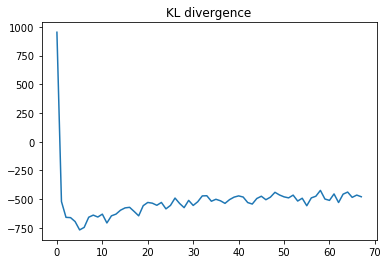

In [66]:
%matplotlib inline
y=optimizer.score_entropy
time=torch.arange(0,len(y),1.)
plt.title('KL divergence')
plt.plot(time, y)

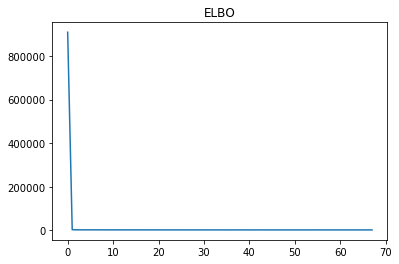

In [67]:
%matplotlib inline
y=torch.as_tensor(optimizer.score_elbo)
time=torch.arange(0,len(y),1.)
plt.title('ELBO')
plt.plot(time, y)


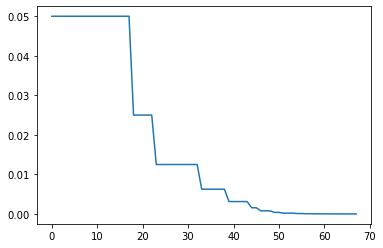

In [68]:
%matplotlib inline
y=optimizer.score_lr
time=torch.arange(0,len(y),1.)
plt.plot(time, y)


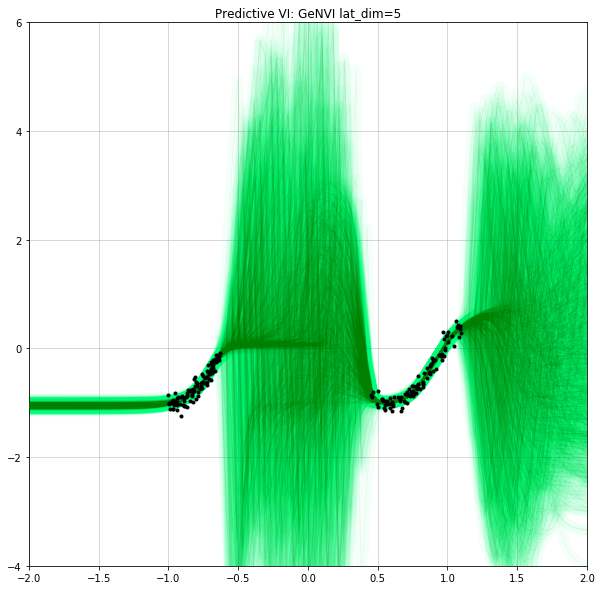

[tensor(101.8017, device='cuda:0'),
 tensor(-116.3581, device='cuda:0'),
 tensor(-163.6185, device='cuda:0')]

In [28]:
%matplotlib inline

def show(GeN,n):
    Z=GeN(n).detach()
    fig=setup.makePlot(Z,device)
    plt.title('Predictive VI: GeNVI lat_dim='+str(lat_dim))
    plt.show()
    return
    

    
show(GeN,1000)
scores

In [15]:
nLPP_train, nLPP_validation, nLPP_test, RSE_train, RSE_validation, RSE_test=setup.evaluate_metrics(GeN(1000).detach(),'
                                                                                                   cpu')

In [16]:
print('nLPP_valid: '+str(nLPP_validation))
print('SE_valid: '+str(RSE_validation))
print('nLPP_test: '+str(nLPP_test))
print('SE_test: '+str(RSE_test))

nLPP_valid: (tensor(-0.8727), tensor(0.7151))
SE_valid: (tensor(0.0102), tensor(0.0145))
nLPP_test: (tensor(0.6314), tensor(1.3946))
SE_test: (tensor(0.2434), tensor(0.3485))


Pour un choix de points $x_0,...,x_{n-1}$, on définit:
$$
d(\theta,\theta')=\frac{1}{n}\sum_{i<n}\vert f_\theta(x_i)-f_{\theta'}(x_i)\vert
$$
ou
$$
d_2(\theta,\theta')=\biggl(\frac{1}{n}\sum_{i<n}\vert f_\theta(x_i)-f_{\theta'}(x_i)\vert^2\biggr)^{\frac{1}{2}}
$$


$P(f\in A)=P(\{\theta \mid f_\theta\in A\})$

$\theta \mapsto f_\theta$ (is it continuous?)

relation entre $d(\theta,\theta')$ et $d(f_\theta,f_\theta')$